## 텍스트 전처리 및 시각화 연습문제

#### 주어진 뉴스기사 데이터를 파악하고, 필요한 컬럼에 대하여 전처리하여 분석하시오.
- 데이터 파일 : 'kor_news_250422.xlsx'

### 1. 필요한 모듈 임포트

In [58]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [52]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

### 2. 데이터 읽고 파악하기

In [4]:
df = pd.read_excel('data/kor_news_250422.xlsx')
df.head()

,뉴스 식별자,언론사,기고자,제목,통합 분류,본문,URL
0,1.600501e+06,무등일보,차솔빈,장기화되는 도시철도 2호선 공사 계속되는 균열 싱크홀에 주민 불안 고조,지역>광주,"광주 도시철도 2호선 공사가 7년째 이어지면서 시민들의 불편이 계속되는 가운데, 공...",http://www.mdilbo.com/detail/c3QycN/741762
1,1.600501e+06,무등일보,차솔빈,엿가락처럼 휜 화순 풍력발전기 설계결함 피로파괴 등 추측 난립,지역>강원,21일 새벽시간대 발생한 화순 도암면 화학산의 풍력발전기 전도 사고의 원인에 대해 ...,http://www.mdilbo.com/detail/c3QycN/741761
2,1.600501e+06,무등일보,박승환,[르포] '코 찌르는 악취'에 고통받는 광주 시내버스 기사들,지역>전남,"""휴게실 바로 옆에 붙어 있는 낡은 화장실 악취 때문에 제대로 쉬지도 못하고 매일매...",http://www.mdilbo.com/detail/c3QycN/741757
3,4.100608e+06,브레이크뉴스,김민중 칼럼니스트,"빅트리, 범죄피해자 지원 ‘회복심리사’ 전문 자격 과정 개설",사회>여성,"▲ 빅트리, 범죄피해자 지원 ‘회복심리사’ 전문 자격 과정 개설 \n \n\n\n\...",http://www.breaknews.com/1111604
4,4.100608e+06,브레이크뉴스,민병홍 칼럼니스트,진짜 대통령을 본다는 의미,정치>청와대,▲ 민병홍 칼럼니스트 ©브레이크뉴스 \n \n\n\n\n\n\n\n\n\n\...,http://www.breaknews.com/1111603


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   뉴스 식별자  20000 non-null  float64
 1   언론사     20000 non-null  object 
 2   기고자     19167 non-null  object 
 3   제목      20000 non-null  object 
 4   통합 분류   20000 non-null  object 
 5   본문      20000 non-null  object 
 6   URL     18517 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [7]:
df.columns

Index(['뉴스 식별자', '언론사', '기고자', '제목', '통합 분류', '본문', 'URL'], dtype='object')

### 3. 분야별로 뉴스 데이터 구분하기

- '분류' 컬럼을 정제하고 전처리하여 뉴스 분류 키워드들(예. 경제, 사회, 문화, 스포츠 등)을 추출하고,
- 분류한 키워드를 기준으로 각 뉴스를 구분하는 '구분' 컬럼을 생성

In [12]:
df['통합 분류']
df['구분'] = df['통합 분류'].str.split('>').str[0]
df.head()

,뉴스 식별자,언론사,기고자,제목,통합 분류,본문,URL,구분
0,1.600501e+06,무등일보,차솔빈,장기화되는 도시철도 2호선 공사 계속되는 균열 싱크홀에 주민 불안 고조,지역>광주,"광주 도시철도 2호선 공사가 7년째 이어지면서 시민들의 불편이 계속되는 가운데, 공...",http://www.mdilbo.com/detail/c3QycN/741762,지역
1,1.600501e+06,무등일보,차솔빈,엿가락처럼 휜 화순 풍력발전기 설계결함 피로파괴 등 추측 난립,지역>강원,21일 새벽시간대 발생한 화순 도암면 화학산의 풍력발전기 전도 사고의 원인에 대해 ...,http://www.mdilbo.com/detail/c3QycN/741761,지역
2,1.600501e+06,무등일보,박승환,[르포] '코 찌르는 악취'에 고통받는 광주 시내버스 기사들,지역>전남,"""휴게실 바로 옆에 붙어 있는 낡은 화장실 악취 때문에 제대로 쉬지도 못하고 매일매...",http://www.mdilbo.com/detail/c3QycN/741757,지역
3,4.100608e+06,브레이크뉴스,김민중 칼럼니스트,"빅트리, 범죄피해자 지원 ‘회복심리사’ 전문 자격 과정 개설",사회>여성,"▲ 빅트리, 범죄피해자 지원 ‘회복심리사’ 전문 자격 과정 개설 \n \n\n\n\...",http://www.breaknews.com/1111604,사회
4,4.100608e+06,브레이크뉴스,민병홍 칼럼니스트,진짜 대통령을 본다는 의미,정치>청와대,▲ 민병홍 칼럼니스트 ©브레이크뉴스 \n \n\n\n\n\n\n\n\n\n\...,http://www.breaknews.com/1111603,정치


In [16]:
df['구분'].unique()

array(['지역', '사회', '정치', '경제', '스포츠', '문화', '국제', 'IT_과학', '미분류'],
      dtype=object)

### 4. '제목' 컬럼 데이터 전처리 및 시각화

- 제목 컬럼 데이터를 전처리하고
- 빈도가 높은 키워드를 추출하여
- 막대그래프와 워드클라우드로 시각화

In [24]:
title = df['제목']

In [36]:
title

0        장기화되는 도시철도 2호선 공사  계속되는 균열 싱크홀에 주민 불안 고조
1             엿가락처럼 휜 화순 풍력발전기  설계결함 피로파괴 등 추측 난립
2               [르포] '코 찌르는 악취'에 고통받는 광주 시내버스 기사들
3               빅트리, 범죄피해자 지원 ‘회복심리사’ 전문 자격 과정 개설
4                                  진짜 대통령을 본다는 의미
                           ...                   
19995                         통합플랫폼 ‘모니모’ 3주년 이벤트
19996       맞춤 솔루션 제공 전문가 100명, 자산가 연령별 내부 데이터 분석
19997                     건강-소득-구매력 5060 ‘젊은 시니어’
19998          자산 대부분 부동산에 묶인 韓 영올드 선진국선 투자-소비 활발
19999                          [경기만평] 단일화게임 오픈예정?
Name: 제목, Length: 20000, dtype: object

In [32]:
len(title)

20000

In [40]:
print(okt.morphs(title[1]))

['엿', '가락', '처럼', '휜', '화순', '풍력', '발전기', '설계', '결함', '피로파괴', '등', '추측', '난립']


In [43]:
title_all = []
for i in range(len(title)):
    okt = Okt()
    t_list = okt.morphs(title[i])
    for t in t_list: 
        if len(t)>1:
            title_all.append(t)
title_all[:100]

['장기',
 '되는',
 '도시철도',
 '호선',
 '공사',
 '계속',
 '되는',
 '균열',
 '싱크홀',
 '주민',
 '불안',
 '고조',
 '가락',
 '처럼',
 '화순',
 '풍력',
 '발전기',
 '설계',
 '결함',
 '피로파괴',
 '추측',
 '난립',
 '르포',
 '찌르는',
 '악취',
 '고통',
 '받는',
 '광주',
 '시내버스',
 '기사',
 '빅트리',
 '범죄',
 '피해자',
 '지원',
 '회복',
 '심리',
 '전문',
 '자격',
 '과정',
 '개설',
 '진짜',
 '대통령',
 '본다는',
 '의미',
 '진주시',
 '거상',
 '관광',
 '루트',
 '사업',
 '본격',
 '착수',
 '지역',
 '에서',
 '시작',
 '탄소',
 '중립',
 '전국',
 '으로',
 '번지',
 '회사채',
 '시장',
 '과극',
 '방산',
 '뭉칫돈',
 '식품',
 '물류',
 '고전',
 'DB',
 '그룹',
 '주주',
 '확보',
 '증권사',
 '체급',
 '키우기',
 '포석',
 '국민',
 '경선',
 '진출',
 '확정',
 '...',
 '김문수',
 '안철수',
 '홍준표',
 '한동훈',
 '구도',
 'MBK',
 '홈플러스',
 '등급',
 '하락',
 '재심',
 '천억',
 '용공',
 '제안',
 '이충',
 '삼성',
 '증권',
 '부사',
 '투자자',
 '눈높이',
 '맞춰야']

In [44]:
len(title_all)

170493

In [139]:
tit_cnt = Counter(title_all)
cnt_df = pd.DataFrame(pd.Series(tit_cnt), columns=['Freq'])
cnt_df.index.name='Word'
sort_df = cnt_df.sort_values(by='Freq', ascending=False)
sort_df.head(10)

,Freq
Word,
...,741
지원,715
사업,688
개최,622
교황,603
이재명,551
포토,535
으로,501
한국,482


In [140]:
def word_Top_count_barplot(cnt_df, max_words):
    df = cnt_df.iloc[:max_words]
    sns.barplot(data=df, x='Freq', y=df.index)
    plt.title(f'Top {max_words} 단어 빈도 그래프')
    plt.show()

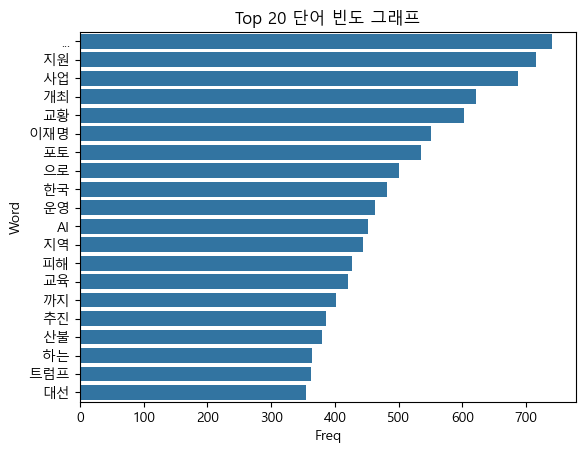

In [141]:
word_Top_count_barplot(sort_df, 20)

In [142]:
type(sort_df)

pandas.core.frame.DataFrame

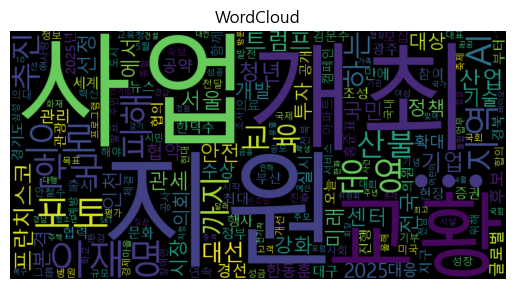

In [143]:
fontpath='C:/Windows/Fonts/malgun.ttf'
wc1 = WordCloud(font_path=fontpath, max_font_size=200,
               width=800, height=400).generate_from_frequencies(tit_cnt)
plt.axis('off')
plt.imshow(wc1, interpolation='bilinear')
plt.title(f'WordCloud')
plt.show()

### 5. '본문' 컬럼 데이터 전처리 및 시각화

- 본문 컬럼 데이터를 전처리하고
- 빈도가 높은 키워드를 추출하여
- 막대그래프와 워드클라우드로 시각화

In [68]:
body = df['본문']
print(okt.nouns(body[0]))

['광주', '도시철도', '호선', '공사', '시민', '불편', '계속', '가운데', '사장', '주변', '주택', '도로', '균열', '싱크홀', '발생', '시민', '불안', '광주', '북구', '등', '전날', '오후', '광주', '북구', '중흥동', '주택', '곳', '외벽', '담장', '등', '균열', '신고', '접수', '이로', '거', '주민', '명', '피해', '시공사']


In [75]:
okt = Okt()
body_all = []
for i in range(len(body)):
    b_list = okt.nouns(body[i])
    body_all += b_list   
body_all[:100]

['광주',
 '도시철도',
 '호선',
 '공사',
 '시민',
 '불편',
 '계속',
 '가운데',
 '사장',
 '주변',
 '주택',
 '도로',
 '균열',
 '싱크홀',
 '발생',
 '시민',
 '불안',
 '광주',
 '북구',
 '등',
 '전날',
 '오후',
 '광주',
 '북구',
 '중흥동',
 '주택',
 '곳',
 '외벽',
 '담장',
 '등',
 '균열',
 '신고',
 '접수',
 '이로',
 '거',
 '주민',
 '명',
 '피해',
 '시공사',
 '새벽',
 '시간대',
 '발생',
 '화순',
 '도암면',
 '화학산',
 '풍력',
 '발전기',
 '전도',
 '사고',
 '원인',
 '대해',
 '설계',
 '문제',
 '자재',
 '불량',
 '피로파괴',
 '등',
 '추측',
 '화순군',
 '등',
 '전날',
 '오후',
 '화순군',
 '도암면',
 '우치',
 '리',
 '화학산',
 '능선',
 '위치',
 '금성산',
 '풍력발전',
 '단지',
 '급',
 '풍력',
 '발전기',
 '높이',
 '중',
 '발전기',
 '대가',
 '휘',
 '이',
 '휴게실',
 '바로',
 '옆',
 '화장실',
 '악취',
 '때문',
 '제대로',
 '못',
 '매일',
 '고통',
 '공간',
 '쉬',
 '광주',
 '지역',
 '시내버스',
 '기사',
 '이용',
 '휴게실',
 '버스']

In [76]:
b_cnt = Counter(body_all)
cnt_df = pd.DataFrame(pd.Series(b_cnt), columns=['Freq'])
cnt_df.index.name='Word'
sort_df = cnt_df.sort_values(by='Freq', ascending=False)
sort_df.head(10)

,Freq
Word,
등,6373
기자,5957
이,4083
서울,4015
사업,3880
위,3739
지역,3649
지난,3481
이번,3326


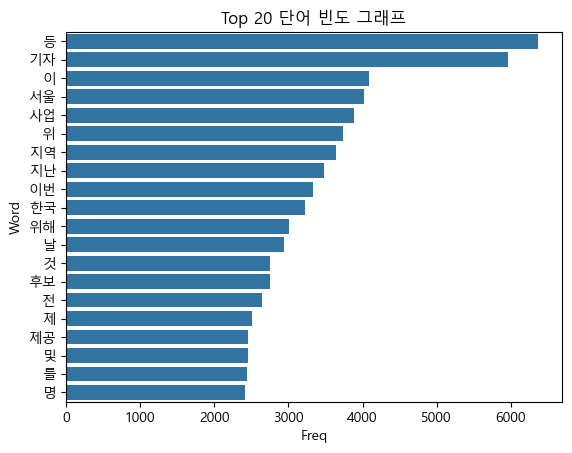

In [77]:
word_Top_count_barplot(sort_df, 20)

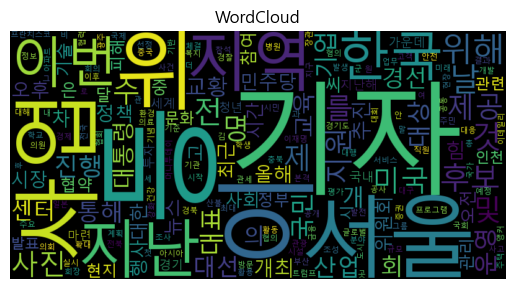

In [79]:
wc2 = WordCloud(font_path=fontpath, max_font_size=200,
               width=800, height=400).generate_from_frequencies(b_cnt)
plt.axis('off')
plt.imshow(wc2, interpolation='bilinear')
plt.title(f'WordCloud')
plt.show()

- 구분에 따라 나누기

In [94]:
area = df[df['구분'] == '지역']['본문']
print(okt.nouns(area[0]))

['광주', '도시철도', '호선', '공사', '시민', '불편', '계속', '가운데', '사장', '주변', '주택', '도로', '균열', '싱크홀', '발생', '시민', '불안', '광주', '북구', '등', '전날', '오후', '광주', '북구', '중흥동', '주택', '곳', '외벽', '담장', '등', '균열', '신고', '접수', '이로', '거', '주민', '명', '피해', '시공사']


In [144]:
# 구분 범주에 있는 본문을 모두 토큰화하여 한 리스트에 저장하는 함수
def cat_search(cat):
    body = df[df['구분'] == cat]['본문']
    okt = Okt()
    body_list = []
    for b in body:
        b_list = okt.nouns(b)
        body_list += b_list
    body_cat = [n for n in body_list if len(n) >= 2]
    return body_cat

In [145]:
# 리스트로 각 단어의 개수를 세서 저장하는 함수
def sort_count(body_cat):
    b_cnt = Counter(body_cat)
    cnt_df = pd.DataFrame(pd.Series(b_cnt), columns=['Freq'])
    cnt_df.index.name='Word'
    sort_df = cnt_df.sort_values(by='Freq', ascending=False)
    return b_cnt, sort_df 

In [146]:
# 각 단어의 빈도를 barplot으로 만드는 함수
def word_Top_barplot(cnt_df, cat, max_words):
    df = cnt_df.iloc[:max_words]
    sns.barplot(data=df, x='Freq', y=df.index)
    plt.title(f'Top {max_words} {cat} 단어 빈도 그래프')
    plt.show()

In [147]:
# 각 단어의 빈도를 단어클라우드로 만드는 함수
def wc_maker(b_cnt, cat):
    wc2 = WordCloud(font_path=fontpath, max_font_size=200,
                   width=800, height=400).generate_from_frequencies(b_cnt)
    plt.axis('off')
    plt.imshow(wc2, interpolation='bilinear')
    plt.title(f'WordCloud:{cat}')
    plt.show()

In [148]:
# 구분에 따라 barplot과 단어클라우드를 만드는 함수
def barplot_and_wc(cat, max_words):
    b_cnt, sort_df = sort_count(cat_search(cat))
    word_Top_barplot(sort_df, cat, max_words)
    wc_maker(b_cnt, cat)

In [149]:
#'지역', '사회', '정치', '경제', '스포츠', '문화', '국제', 'IT_과학', '미분류'

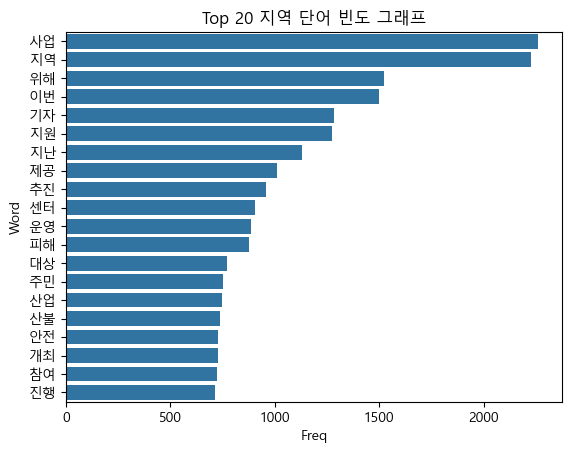

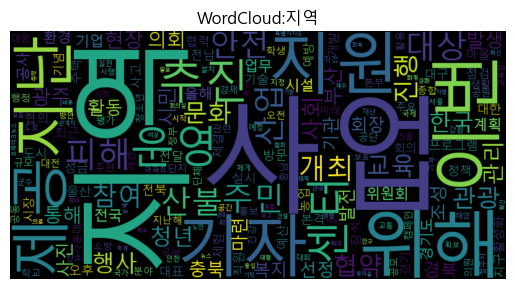

In [126]:
barplot_and_wc('지역', 20)

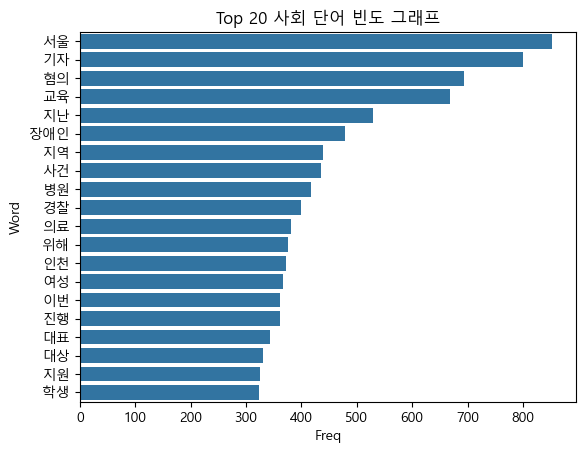

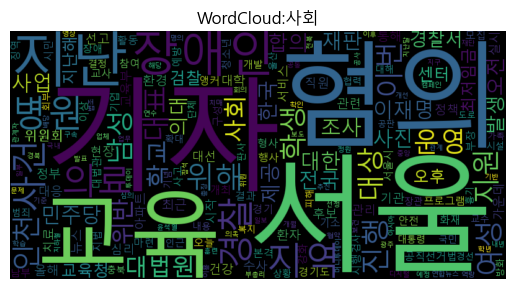

In [128]:
barplot_and_wc('사회', 20)

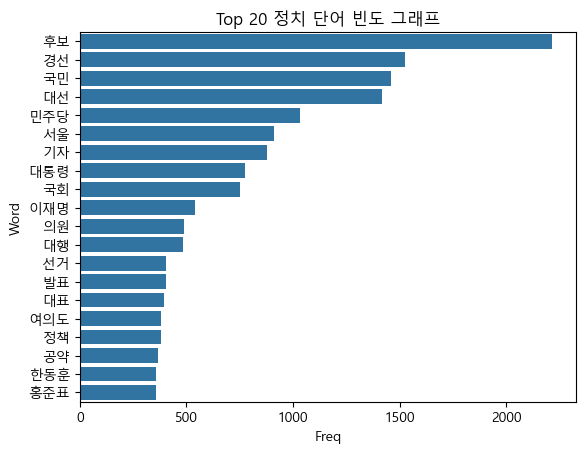

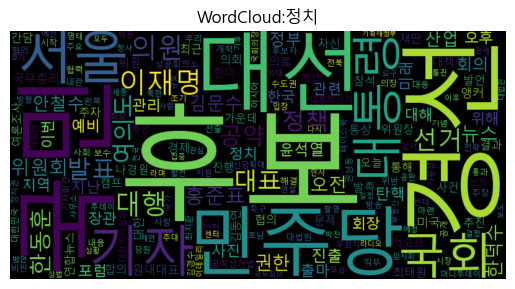

In [132]:
barplot_and_wc('정치', 20)

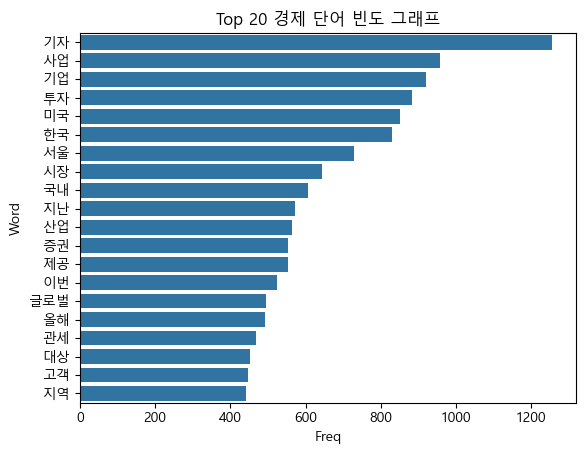

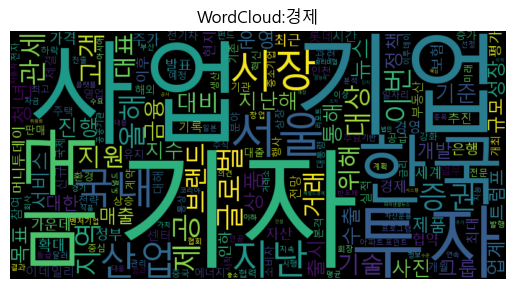

In [133]:
barplot_and_wc('경제', 20)

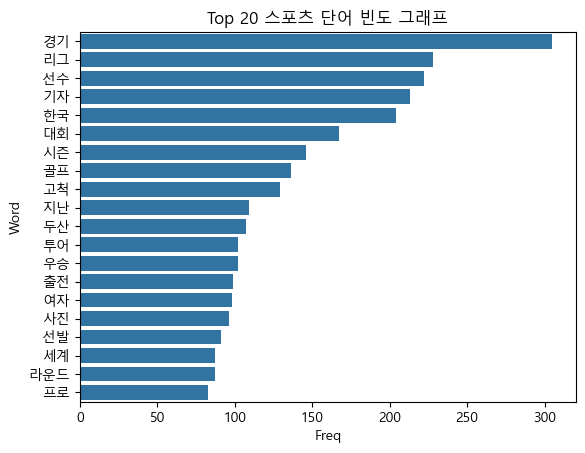

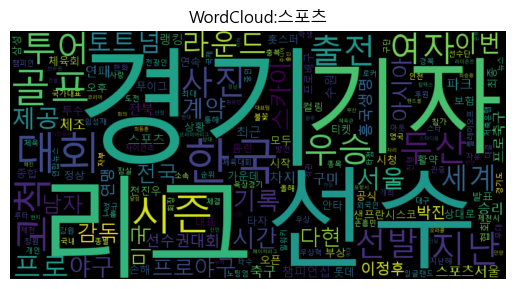

In [134]:
barplot_and_wc('스포츠', 20)

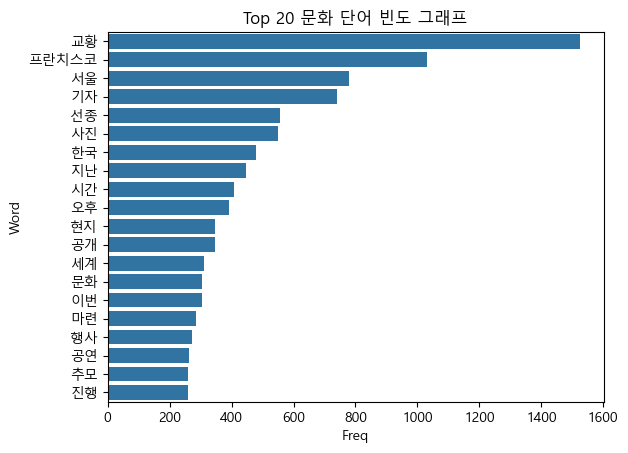

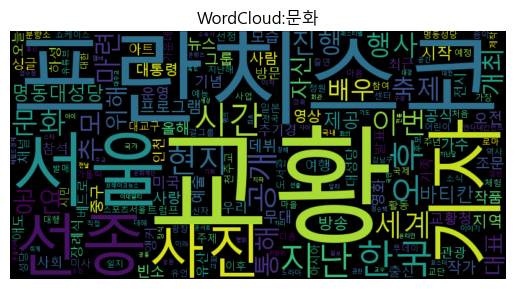

In [135]:
barplot_and_wc('문화', 20)

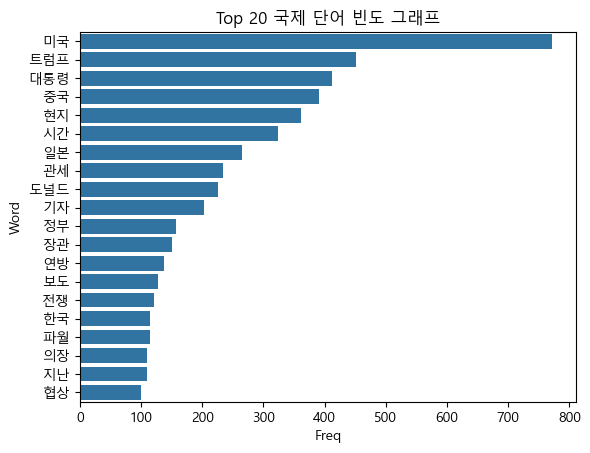

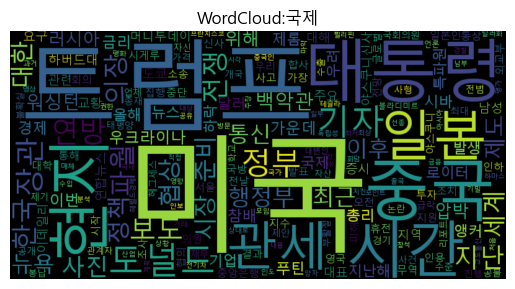

In [136]:
barplot_and_wc('국제', 20)

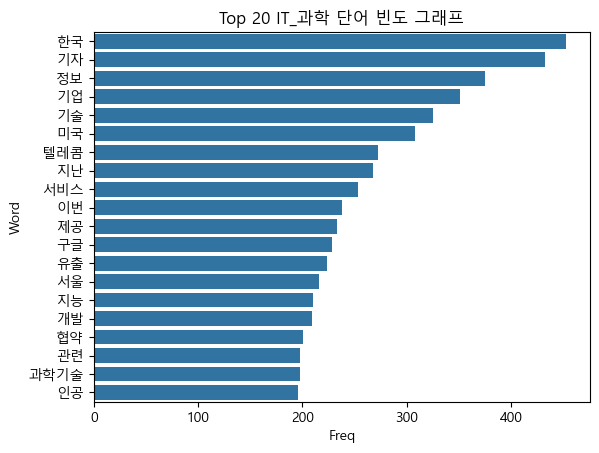

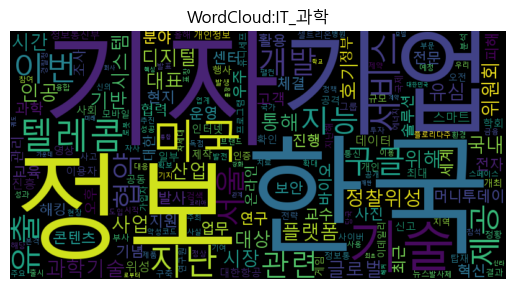

In [137]:
barplot_and_wc('IT_과학', 20)

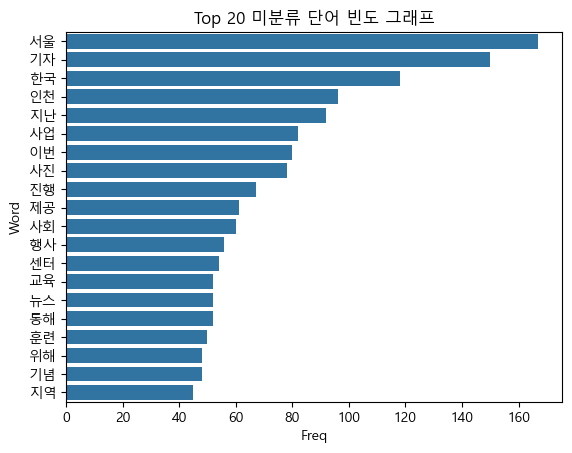

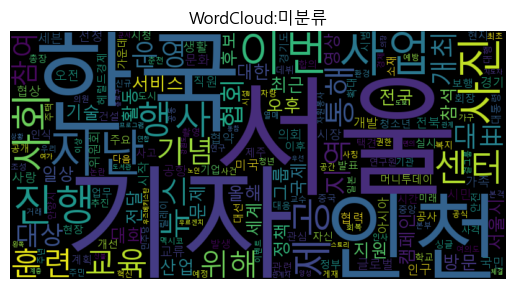

In [138]:
barplot_and_wc('미분류', 20)

----